Unlike Simple linear Regression model , multiple LR model has multiple independent variable taht effect the values of the dependent variable.

In the given data set, each row corresponds to an anonymous compnay. The data says how much each company has spend on R&D, admin ,marketing and the location of componay ...and eventually the profit.

We have to find out which type of company can yeild more profit and whats the relation betwn the profit and the independent var

profit = intercept + r&d + admin + marketing + ?
y = b0 + b1x1 + b2x2 + b3x3 + ?

here state is categorical variable, we need to use dummy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


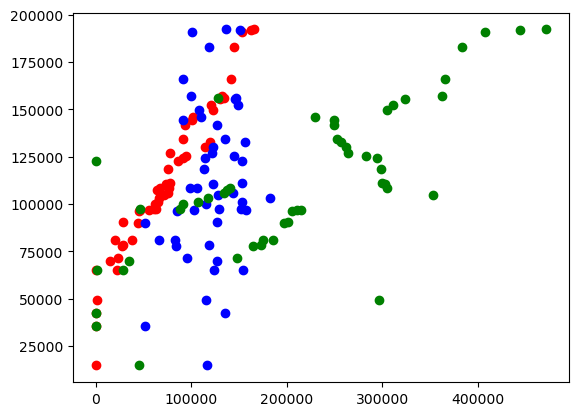

In [9]:
plt.scatter(data['R&D Spend'],data['Profit'],color = 'red')
plt.scatter(data['Administration'],data['Profit'],color = 'blue')
plt.scatter(data['Marketing Spend'],data['Profit'],color = 'green')
	


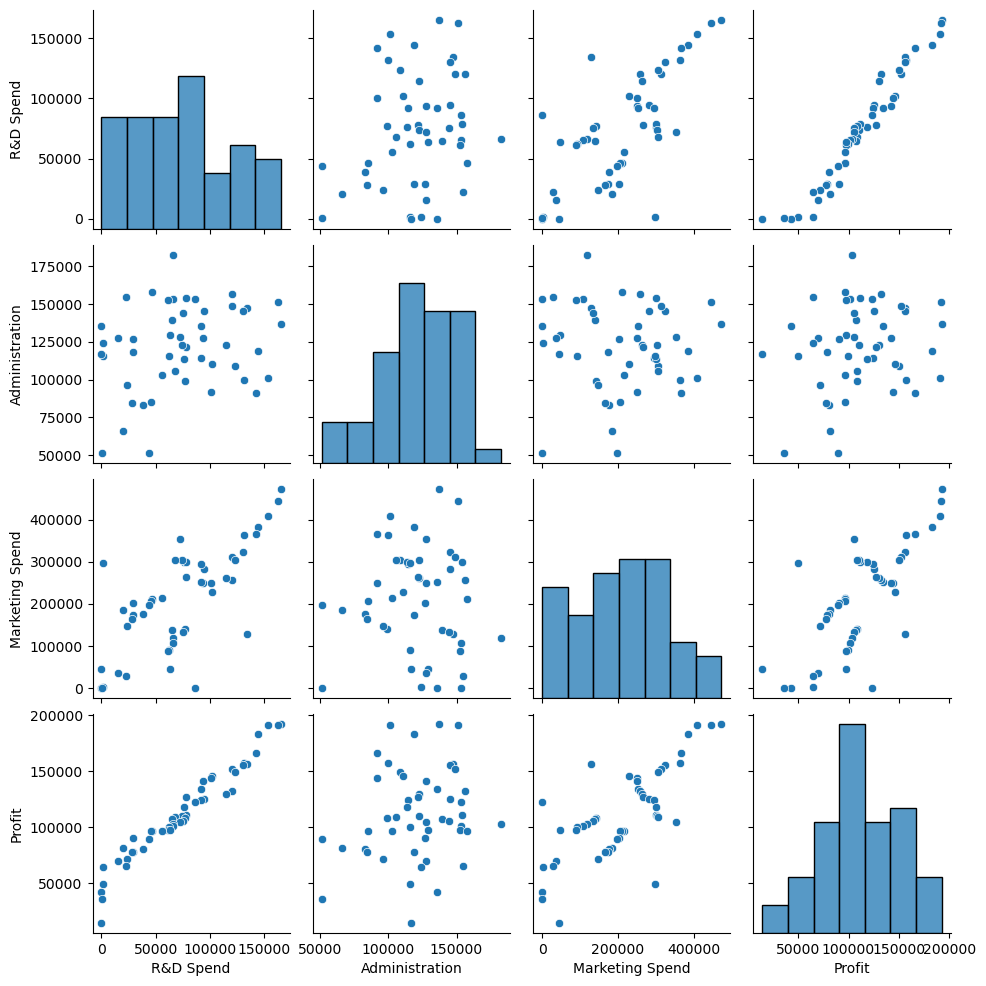

In [10]:
sns.pairplot(data)

In [18]:
X = data.iloc[:,:-1].values
y= data.iloc[:,-1].values
print(X[:5,:])

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]


In [19]:
#for replacing dummy variables in categorical column - 'state'
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder' , OneHotEncoder() , [-1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [20]:
print(X[:5,:])

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The multiple linear regression model class that we are about to call will automatcillay select the most significant features and also automatically eliminate the dummy variabl trap. Hence we don't need to implement any backward elimination, forwar selection, birectional elimination etc in order to pull out most relevant features of the dataset.

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regression = LinearRegression()

In [26]:
regression.fit(X_train, y_train)

LinearRegression()

In [38]:
predictions = regression.predict(X_test)
np.set_printoptions(precision=2)
#to view the predicted profit and actual profit side by side use the below
print(np.concatenate((predictions.reshape(len(predictions),1),y_test.reshape(len(y_test),1)),axis = 1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [44]:
regression.coef_

array([ 8.66e+01, -8.73e+02,  7.86e+02,  7.73e-01,  3.29e-02,  3.66e-02])

Therefore, the equation of our multiple linear regression model is:

Profit=86.6×Dummy State 1−873×Dummy State 2+786×Dummy State 3+0.773×R&D Spend+0.0329×Administration+0.0366×Marketing Spend+42467.53

Important Note: To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

In [43]:
regression.intercept_

np.float64(42467.52924854249)

Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [41]:
print(regression.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


Therefore, our model predicts that the profit of a Californian startup which spent 160000 in R&D, 130000 in Administration and 300000 in Marketing is $ 181566,92.

Important note 1: Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array. Simply put:

1,0,0,160000,130000,300000→scalars 

[1,0,0,160000,130000,300000]→1D array 

[[1,0,0,160000,130000,300000]]→2D array 

Important note 2: Notice also that the "California" state was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the second row of the matrix of features X, "California" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, not the last three ones, because the dummy variables are always created in the first columns.